# Ajuste de Curvas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

O método de mínimos quadrados é uma técnica amplamente utilizada para ajustar um modelo aos dados experimentais, minimizando a soma dos quadrados dos resíduos 


O resíduo quantifica a diferença entre o valor observado $y_i$ e o valor previsto pela função $Y(x_i, \{a_j\})$:

$$\Delta_i = Y(x_i, \{a_j\}) - y_i$$

O objetivo é ajustar os parâmetros do modelo $a_j$ para que a soma dos quadrados dos resíduos seja a menor possível, ou seja minimizar

$$\sum_{i=1}^N (\Delta_i)^2 = \sum_{i=1}^N (Y(x_i, \{a_j\}) - y_i)^2


No `Scipy`, podemos usar a função `scipy.optimize.leastsq()` para resolver problemas de ajuste por mínimos quadrados.

### Sintaxe Básica

```python
scipy.optimize.leastsq(func, x0, args=())
```

- **func**: Função que calcula o resíduo. Ela recebe um conjunto de parâmetros do modelo e retorna o vetor de resíduos.
- **x0**: Estimativa inicial para os parâmetros a serem otimizados.
- **args**: Argumentos adicionais passados para a função func.

Observe que é a função resíduo que aparece como argumento do `scipy.optmize`

A função retorna dois valores:

- O primeiro argumento consiste nos **Parâmetros otimizado**, ou seja, os valores dos parâmetros do modelo que minimizam a soma dos quadrados dos resíduos.
- O segundo valor retornado retorna um código de término que pode ser interpretado da seguinte maneira:
    - **1** $\rightarrow$ Convergência bem-sucedida, ou seja, a função encontrou uma solução ótima e o processo de otimização terminou corretamente.
    - **2** $\rightarrow$ A solução não convergiu, mas o número máximo de iterações foi alcançado.
    - **3** $\rightarrow$ A solução não convergiu e ocorreu um erro devido a uma falta de progressão significativa entre iterações sucessivas.
    - **4** $\rightarrow$ Outro tipo de erro ou falha no processo de otimização.

Vamos ilustrar a aplicação com um exemplo, primeiro vamos exibir uma série de pontos e fazer o gráfico deles

In [ ]:
import scipy.optimize as opt

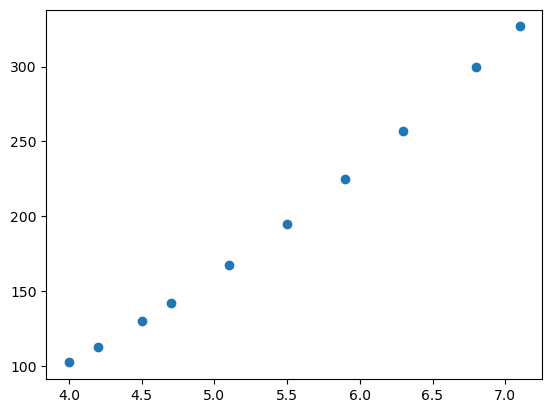

In [ ]:
x = np.array([4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1])
y = np.array([102.56, 113.18, 130.11, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72])

fig, ax = plt.subplots()
ax.scatter(x,y)

Vamos agora definir a função que descreve o modelo bem como a função resíduo (vamos considerar que a função é ajustada por um polinômio de ordem 2)

In [ ]:
# Função de modelo (quadrática)
def modelo(params, x):
    a, b, c = params
    return a * x**2 + b * x + c

# Função de resíduo
def resido(params, x, y):
    return modelo(params, x) - y

In [ ]:
# Usando o método dos mínimos quadrados para otimizar os parâmetros
a_fit, flag = opt.leastsq(resido, [1,1,1], args=(x, y))

Observe que a função `.leastsq`retorna dois valores, o primeiro sendo os parametros ajustados e o segundo uma flag sobre a convergência do método

In [ ]:
print(a_fit)
print(flag)

[ 6.61821096 -1.14352388  1.23556172]
1


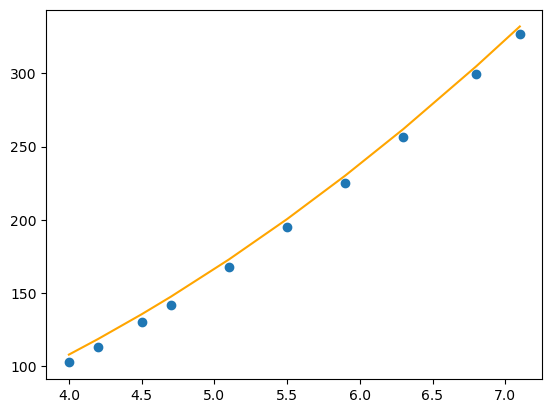

In [ ]:
fig, ax = plt.subplots()

ax.scatter(x,y)
ax.plot(x, a_fit[0]*x*x + a_fit[1]*x +  a_fit[0], color = 'orange' )

Vamos considerar outro exemplo agora, onde a função que iremos ajustar que iremos utilizar é do tipo não linear

$$ f(x) = a_0 e^{-a_1 x}$$

onde os dados estão descrito abaixos:

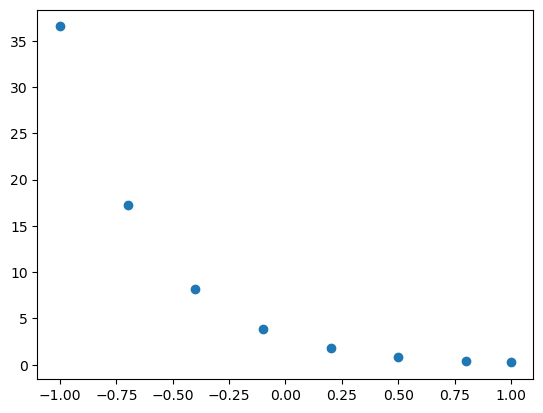

In [ ]:
x = np.array([-1.0, -0.7, -0.4, -0.1, 0.2, 0.5, 0.8, 1.0])
y = np.array([36.547, 17.264, 8.155, 3.852, 1.820, 0.860, 0.406, 0.246])

fig, ax = plt.subplots()
ax.scatter(x,y)

Definindo as funções do modelo e residuo temos

In [ ]:
# Função de modelo (não linear)
def modelo(params, x):
    a0, a1 = params
    return a0 * np.exp(- a1 * x)

# Função de resíduo
def resido(params, x, y):
    return modelo(params, x) - y

Assim, utilizando `.leastsq`, obtemos os parametros que melhores ajustam e a flag.

In [ ]:
a0, a1 = 1, 1
a_fit, flag = optimize.leastsq(resido, [a0, a1], args=(x, y))

print(flag)
print(a_fit)

3
[3.00016682 2.49993136]


```{important}

O código 3 indica que a otimização não convergiu completamente, geralmente devido à falta de progresso significativo nas iterações. Isso pode ocorrer por um chute inicial inadequado, modelo mal condicionado ou dados insuficientes. No entanto, é possível obter um bom ajuste mesmo com esse código, pois o modelo pode já estar minimizando adequadamente o resíduo, embora o algoritmo não tenha convergido de maneira ideal. É importante avaliar o ajuste visualmente e verificar se os parâmetros ajustados são razoáveis para o problema.

```

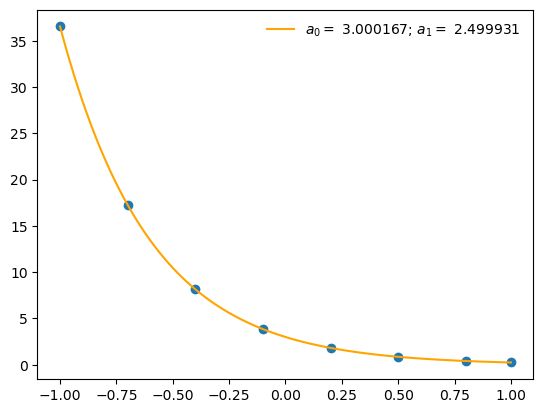

In [ ]:
fig, ax = plt.subplots()

xx = np.linspace(-1,1,100)

ax.plot(xx, a_fit[0]*np.exp(- a_fit[1]*xx),
           label=r"$a_0 = $ %f; $a_1 = $ %f" % (a_fit[0], a_fit[1]),
           color = 'orange')

ax.scatter(x,y)

ax.legend(numpoints=1, frameon=False)